In [1]:
import os
import sys

In [2]:
# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP
from four_tanks import simulate

In [12]:
T = 1400
T_s = 1
time = np.arange(0, T+1, T_s)
T = max(time)
n_sampl = T//T_s+1
tau_u = 0
tau_y = 0
x0 = [12.4, 1.8, 12.7, 1.4]
active_noise = False # wartość False wyłącza zakłócenia, wartość True włącza
noise_sigma = 0.1
e_sigma = 0.005

In [13]:
# cm
qa = 3*3.33# 3.15*3.14 #3*3.33
qb = 3*3.35#3.15*3.29 #3*3.35
q = np.vstack((np.ones((1, n_sampl))* qa, np.ones((1, n_sampl))* qb))
x_max = np.inf
x_min = -np.inf
gamma_a = 0.7
gamma_b = 0.6
S = np.array([28, 32, 28, 32])
a = np.array([0.071, 0.057, 0.071, 0.057]) # przekrój otworu wylotowego
c = np.array([0.5, 0.5, 0.5, 0.5])

In [14]:
q[:, [0]]

array([[ 9.99],
       [10.05]])

In [15]:
# qa = 1630000/3600
# qb = 2000000/3600
# q = np.vstack((np.ones((1, n_sampl))* qa, np.ones((1, n_sampl))* qb))
# x_max = np.inf
# x_min = -np.inf
# gamma_a = 0.3
# gamma_b = 0.4
# S = np.array([60, 60, 60, 60])
# a = np.array([1.31, 1.51, 0.927, 0.882]) # przekrój otworu wylotowego
# c = np.array([0.5, 0.5, 0.5, 0.5])a


In [16]:
x, y, z = simulate(x0, x_max, x_min, gamma_a, gamma_b, S, a, c, q, T, T_s, tau_u, tau_y, active_noise, noise_sigma, e_sigma)

In [17]:
x

array([[ 12.4       ,  12.64975   ,  12.8995    , ..., 361.5505    ,
        361.80025   , 362.05      ],
       [  1.8       ,   1.9884375 ,   2.176875  , ..., 265.235625  ,
        265.4240625 , 265.6125    ],
       [ 12.7       ,  12.44330268,  12.19067121, ...,   1.63394113,
          1.63394113,   1.63394113],
       [  1.4       ,   1.40030108,   1.40059211, ...,   1.4090447 ,
          1.4090447 ,   1.4090447 ]])

In [18]:
title_end = f" dla $x_0$={x0}, $\gamma_a$={gamma_a}, $\gamma_b$={gamma_b}"

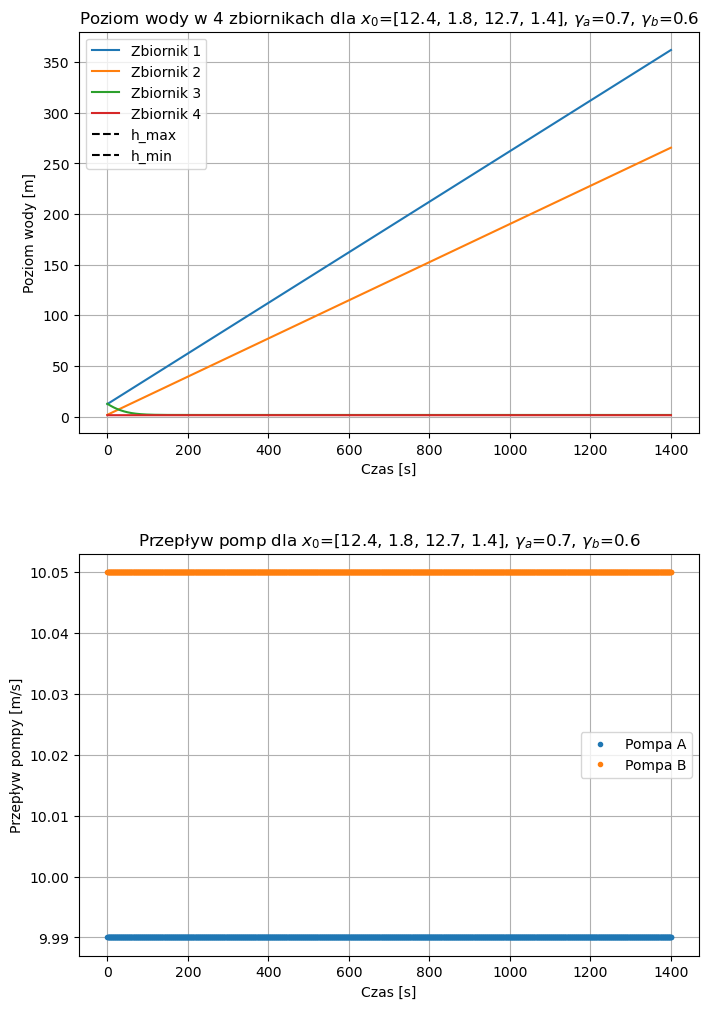

In [19]:
fig2=plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.plot(time, x[0], label='Zbiornik 1')
plt.plot(time, x[1], label='Zbiornik 2')
plt.plot(time, x[2], label='Zbiornik 3')
plt.plot(time, x[3], label='Zbiornik 4')
plt.axhline(y=x_max, color='black', linestyle='--', label='h_max')
plt.axhline(y=x_min, color='black', linestyle='--', label='h_min')
plt.xlabel('Czas [s]')
plt.ylabel('Poziom wody [m]')
plt.title("Poziom wody w 4 zbiornikach"+title_end)
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, q[0], '.', label='Pompa A')
plt.plot(time, q[1], '.', label='Pompa B')
plt.xlabel('Czas [s]')
plt.ylabel('Przepływ pompy [m/s]')
plt.title('Przepływ pomp'+title_end)
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=0.3)

In [12]:
x[:, -40:]

array([[64.33800864, 64.33396134, 64.32998536, 64.32607947, 64.32224243,
        64.31847302, 64.31477006, 64.31113237, 64.30755881, 64.30404825,
        64.30059958, 64.29721171, 64.29388357, 64.2906141 , 64.28740229,
        64.2842471 , 64.28114755, 64.27810265, 64.27511144, 64.27217298,
        64.26928633, 64.26645059, 64.26366485, 64.26092825, 64.2582399 ,
        64.25559897, 64.25300461, 64.25045601, 64.24795235, 64.24549286,
        64.24307674, 64.24070324, 64.23837161, 64.2360811 , 64.233831  ,
        64.23162058, 64.22944916, 64.22731603, 64.22522054, 64.22316202],
       [63.82345965, 63.82335876, 63.8232608 , 63.82316568, 63.82307332,
        63.82298364, 63.82289656, 63.82281201, 63.82272991, 63.8226502 ,
        63.8225728 , 63.82249764, 63.82242466, 63.82235381, 63.822285  ,
        63.8222182 , 63.82215333, 63.82209035, 63.82202919, 63.82196981,
        63.82191215, 63.82185616, 63.8218018 , 63.82174901, 63.82169776,
        63.82164799, 63.82159967, 63.82155275, 63.

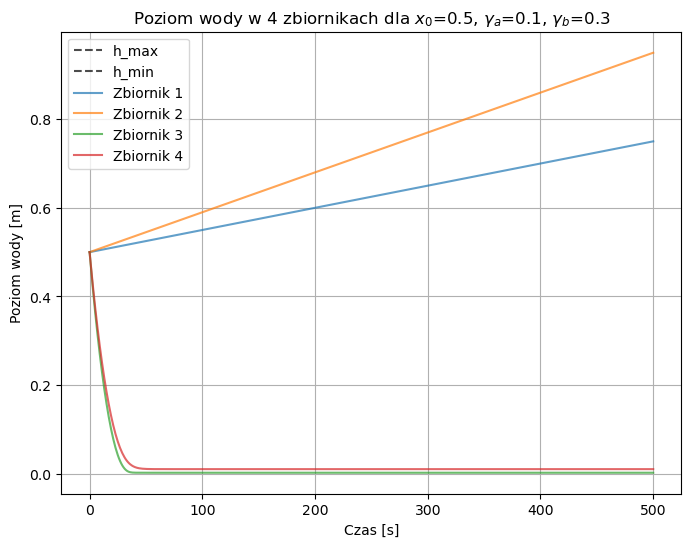

In [25]:
plt.figure(figsize=(8, 6))
plt.axhline(y=x_max, color='black', linestyle='--', alpha=0.7, label='h_max')
plt.axhline(y=x_min, color='black', linestyle='--', alpha=0.7, label='h_min')
plt.plot(time, x[0], alpha=0.7, label='Zbiornik 1')
plt.plot(time, x[1], alpha=0.7, label='Zbiornik 2')
plt.plot(time, x[2], alpha=0.7, label='Zbiornik 3')
plt.plot(time, x[3], alpha=0.7, label='Zbiornik 4')
plt.xlabel('Czas [s]')
plt.ylabel('Poziom wody [m]')
plt.title("Poziom wody w 4 zbiornikach"+title_end)
plt.legend()
plt.grid()
# plt.savefig("x.png")
plt.show()

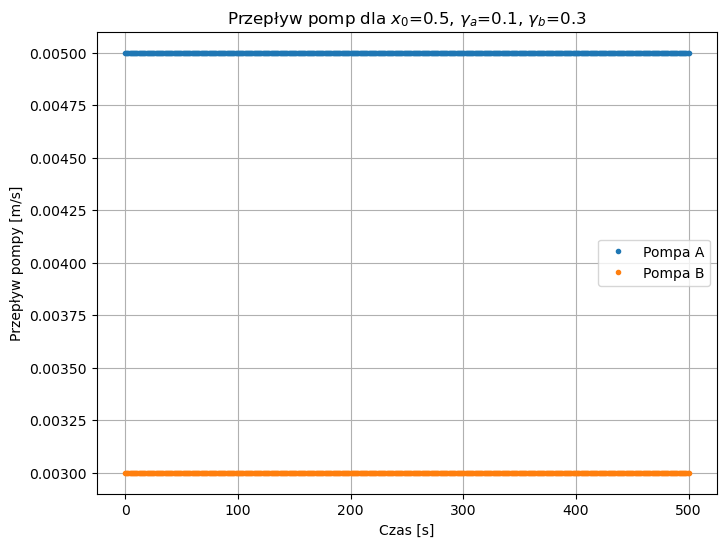

In [18]:

plt.figure(figsize=(8, 6))
plt.plot(time, q[0], '.', label='Pompa A')
plt.plot(time, q[1], '.', label='Pompa B')
plt.xlabel('Czas [s]')
plt.ylabel('Przepływ pompy [m/s]')
plt.title('Przepływ pomp'+title_end)
plt.legend()
plt.grid()
# plt.savefig("q.png")
plt.show()

In [10]:
g = 9.81

In [11]:
n_sampl = T//T_s+1
p = np.reshape(a/S * np.sqrt(2*g), (4, -1))

A = np.array(
[[-1, 0, 1, 0],
    [0, -1, 0, 1],
    [0, 0, -1, 0],
    [0, 0, 0, -1]])

B = np.array(
    [[gamma_a/S[0], 0],
    [0, gamma_b/S[1]],
    [0, (1-gamma_b)/S[2]],
    [(1-gamma_a)/S[3], 0]])

C = np.array(
    [[c[0], 0, 0, 0],
    [0, c[1], 0, 0],
    [0, 0, c[2], 0],
    [0, 0, 0, c[3]]])

F = np.array(
    [[1, 0, 0, 0],
    [0, 1, 0, 0]])

x = np.ones((4, n_sampl))
x[:, 0:max(tau_u, tau_y, 1)] = x0
y = np.empty((4, n_sampl))
z = F @ x

In [12]:
x

array([[0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]])

In [13]:
t = max(tau_u, tau_y, 1)
t

3

In [14]:
A @ p * np.sqrt(x[:, [t-1]]) + B @ q[:, [t-tau_u]] + np.random.randn(4,1)*noise_sigma*active_noise

array([[0.6       ],
       [0.6       ],
       [0.36868443],
       [0.36868443]])

In [15]:
T_s * (A @ p * np.sqrt(x[:, [t-1]]) + B @ q[:, [t-tau_u]] + np.random.randn(4,1)*noise_sigma*active_noise)

array([[0.6       ],
       [0.6       ],
       [0.36868443],
       [0.36868443]])

In [21]:
for t in range(max(tau_u, tau_y, 1), n_sampl):
    print(t)
    x[:, [t]] = x[:, [t-1]] + T_s * (A @ p * np.sqrt(x[:, [t-1]]) + B @ q[:, [t-tau_u]] + np.random.randn(4,1)*noise_sigma*active_noise)
    x[:, t] = np.clip(x[:, t], x_min, x_max)
    y[:, [t]] = C @ x[:, [t-tau_y]] + np.random.randn(4,1)*e_sigma*active_noise
    z[:, [t]] = F @ x[:, [t]]

3
4
5
6
7
8
9
10


In [22]:
p

array([[0.04428691],
       [0.04428691],
       [0.04428691],
       [0.04428691]])

In [23]:
np.sqrt(x[:, [5]])

array([[1.51657509],
       [1.51657509],
       [1.25632115],
       [1.25632115]])

In [24]:
p * np.sqrt(x[:, [t-1]])

array([[0.09601172],
       [0.09601172],
       [0.07572104],
       [0.07572104]])